# Fourier transforming 2 second epochs

In [67]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autoreject
from autoreject import *
import scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.stats.mstats import zscore
#from fooof import FOOOF

ROOT = '/home/dcellier/RDSS/CMI_data/MIPDB/EEGData/'

In [6]:
import pickle
sub='A00056054'
def read_object(filename):

                ''' short hand for reading object because I can never remember pickle syntax'''

                o = pickle.load(open(filename, "rb"))     

                return o
twoSec_EC_epoch=read_object(ROOT+sub+'/EEG/preproc/'+sub+'_epoch_eyesClosed')

Loading data for 61 events and 1001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


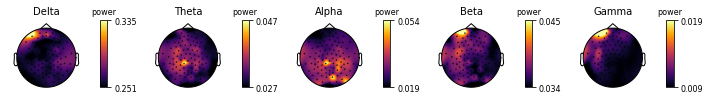

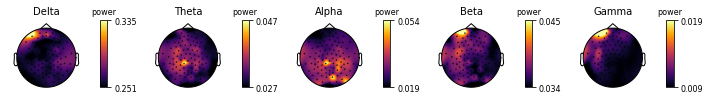

In [7]:
twoSec_EC_epoch.plot_psd_topomap(ch_type='eeg', normalize=True,cmap='inferno',outlines='head') 
#interactive mode possible in ipython

In [9]:

#should be using the scrubbed epochs but its ok for now
psds,freqs=mne.time_frequency.psd_welch(twoSec_EC_epoch,fmin=1,fmax=50,tmax=2,n_overlap=(len(twoSec_EC_epoch.times)*.125))
# default FFT is 256
# n_overlap at 12.5% like sangtae
# length of ea Welch segment defaults to 256
# *** this function is taking issue w/ picks=realData-- don't know why ****
# there is another function, mne.time_frequency.psd_array_welch-- what's the diff?
# psds = psd's, shape (n_epochs,n_channels,n_freqs)
    # should I average over n_epochs now?
        # and then for IAF it would be the avg psd's for occiptal electrodes & alpha freqs ?
        

Loading data for 61 events and 1001 original time points ...
Effective window size : 0.512 (s)


In [ ]:
# electrode clustering: run on all sbujects, average over
# similarity matrix bween every electrode and every other, builds up hierarchically
# w matlab: given all [Power Spectrum X channel] matrix, pdist function yields something that you feed into dendrogram (find scipy equivalent)

# average in time domain (of epochs) across clusters, then run psd_welch on that. FOOOF takes a matrix of the psd's
# frontal-central cluster and parietal occipital cluster manually for now, run FOOOF and give: peak freq, amp, bandwidth for theta/beta and alpha in parietal/occ cluster
# give the slope and y-int for ea of the 2 clusters
# 13 neural data points per person: beta fareq, beta amp, beta bandwidth, theta freq, theta amp, thea bandwidth, alpha freq, alpha amp, alpha bandwidth, frontal slope, frontal yint, posterior slope, yint   
# demographic data points (age/sex)

In [41]:
psds.shape

(61, 90, 25)

In [58]:
chFreqs=np.mean(psds,axis=0)
chFreqs.shape

(90, 25)

In [59]:
#np.matrix(psds)
chFreqs

array([[2.35062510e-11, 9.48265145e-12, 5.42047349e-12, ...,
        5.56757788e-13, 5.99274833e-13, 5.75237116e-13],
       [2.41081378e-11, 9.61453218e-12, 5.66157224e-12, ...,
        5.49679508e-13, 6.12084800e-13, 5.91706183e-13],
       [2.09048711e-11, 9.70551358e-12, 5.98914466e-12, ...,
        4.79592760e-13, 5.44878391e-13, 5.34798041e-13],
       ...,
       [2.11010137e-11, 8.41594843e-12, 5.22876356e-12, ...,
        4.60511383e-13, 5.00324245e-13, 4.88442519e-13],
       [2.24310176e-11, 9.65923161e-12, 5.78676824e-12, ...,
        5.14156529e-13, 5.65052994e-13, 5.73652108e-13],
       [2.11115431e-11, 9.70597618e-12, 5.92897948e-12, ...,
        4.78301086e-13, 5.40154353e-13, 5.33472437e-13]])

In [70]:
Y=pdist(zscore(np.corrcoef(chFreqs)))
Y=pdist(chFreqs)
Z= linkage(Y)
Z.shape

(89, 4)

In [71]:
#val=pdist(psd,'euclidean')
#val.shape
#val

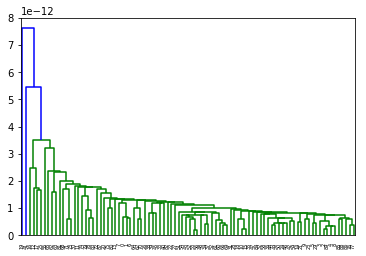

In [75]:
plot=dendrogram(Z,90,truncate_mode='mlab')

In [76]:
ep=twoSec_EC_epoch

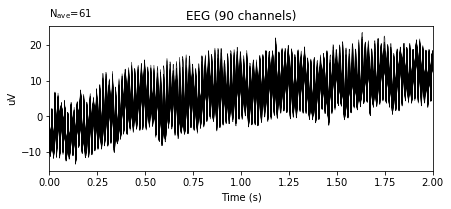

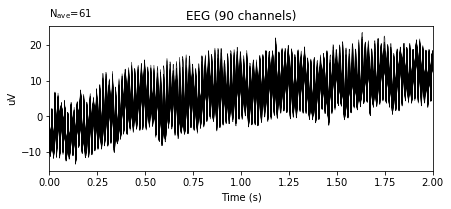

In [78]:
ep.average().plot()

In [ ]:
ep